In [81]:
import numpy as np
import pandas as pd
from sympy.codegen.ast import int64

df = pd.read_csv("data/survey_results_public.csv")
shema_df = pd.read_csv('data/survey_results_schema.csv')
df = df.loc[((df["Country"] == "United States of America") & (df["CompTotal"] <= 500000))]
df




,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
6,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,...,1-2 times a week,3-5 times a week,1-2 times a week,Less than 15 minutes a day,15-30 minutes a day,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development...",Appropriate in length,Easy,135000.0
7,8,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,60-120 minutes a day,30-60 minutes a day,None of these,Financial Services,NaN,NaN,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89145,89146,I agree,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",In-person,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,3-5 times a week,60-120 minutes a day,15-30 minutes a day,None of these,Higher Education,Appropriate in length,Neither easy nor difficult,45000.0
89154,89155,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,...,Never,1-2 times a week,1-2 times a week,30-60 minutes a day,30-60 minutes a day,Developer portal or other central places to fi...,"Information Services, IT, Software Development...",Appropriate in length,Easy,75000.0
89156,89157,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 tim

In [31]:

df[["YearsCode", "WorkExp", "YearsCodePro", "OrgSize", "Age", "PurchaseInfluence", "RemoteWork", "DevType", "EdLevel"]].dropna()


,YearsCode,WorkExp,YearsCodePro,OrgSize,Age,PurchaseInfluence,RemoteWork,DevType,EdLevel
1,18,10.0,9,2 to 9 employees,25-34 years old,I have a great deal of influence,Remote,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,27,23.0,23,"5,000 to 9,999 employees",45-54 years old,I have some influence,"Hybrid (some remote, some in-person)","Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
3,12,7.0,7,100 to 499 employees,25-34 years old,I have some influence,"Hybrid (some remote, some in-person)","Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
6,4,4.0,3,"1,000 to 4,999 employees",35-44 years old,I have little or no influence,Remote,"Developer, full-stack",Some college/university study without earning ...
7,5,5.0,3,10 to 19 employees,25-34 years old,I have some influence,Remote,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
...,...,...,...,...,...,...,...,...,...
89145,23,15.0,12,10 to 19 employees,35-44 years old,I have some influence,In-person,Academic researcher,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
89154,20,8.0,8,2 to 9 employees,35-44 years old,I have some influence,"Hybrid (some remote, some in-person)","Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
89156,12,8.0,8,100 to 499 employees,25-34 years old,I have little or no influence,Remote,Engineering manager,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
89175,10,8.0,8,10 to 19 employees,25-34 years old,I have some influence,Remote,"Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


In [84]:
shema_df

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


In [80]:

df = df[["OrgSize","YearsCode", "YearsCodePro", "WorkExp","Age", "CompTotal"]].dropna()
df = df[~df['Age'].isin(["Prefer not to say"])]
def convert_age(age):
    if 'Under 18' in age:
        return 17  # Повертаємо 17 для "Under 18 years old"
    elif '65 years or older' in age:
        return 65  # Повертаємо 65 для "65 years or older"
    else:
        range_values = age.split('-')  # Беремо два значення діапазону
        return (float(range_values[0]) + float(range_values[1].split()[0])) / 2  # Повертаємо середнє значення
df['Age'].apply(convert_age)

1        29.5
2        49.5
3        29.5
6        39.5
7        29.5
         ... 
89145    39.5
89154    39.5
89156    29.5
89175    29.5
89178    49.5
Name: Age, Length: 7994, dtype: float64

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 
# df = pd.read_csv("data/survey_results_public.csv")
# filt = ((df["Country"] == "United States of America") & (df["CompTotal"] <= 500000))
# salary = df.loc[filt, parameters].replace(["Less than 1 year", 'More than 50 years'], [0, 50]).dropna()
# 
# # plt.scatter(range(salary.shape[0]), salary, s=5)
# 
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# salary = salary.head(100)
# ax.scatter(np.array(salary["YearsCode"], dtype=int), np.array(salary["WorkExp"], dtype=int), np.array(salary["CompTotal"], dtype=int), marker='o')
# 
# plt.show()

In [4]:
import re

def parse_iterations_and_costs(data):
    # Регулярний вираз для парсингу номерів ітерацій та значень Cost
    pattern = r"Iteration (\d+); Cost ([\d\.]+);"
    
    # Знаходження всіх співпадінь у даних
    matches = re.findall(pattern, data)
    
    # Розділення результатів на два масиви: ітерації та значення Cost
    iterations = [int(match[0]) for match in matches]
    costs = [float(match[1]) for match in matches]
    
    return iterations, costs

In [5]:
data = '''
Time: 16:09:10; Iteration 0; Cost 15717216301.066456;
Time: 16:09:12; Iteration 100; Cost 13357952109.464052;
Time: 16:09:13; Iteration 200; Cost 11428556168.635445;
Time: 16:09:15; Iteration 300; Cost 9850428695.711964;
Time: 16:09:16; Iteration 400; Cost 8559424599.05473;
Time: 16:09:18; Iteration 500; Cost 7503169655.984598;
Time: 16:09:19; Iteration 600; Cost 6638882848.3305;
Time: 16:09:21; Iteration 700; Cost 5931607009.646167;
Time: 16:09:23; Iteration 800; Cost 5352769567.3529415;
Time: 16:09:24; Iteration 900; Cost 4879010645.781492;
Time: 16:09:26; Iteration 1000; Cost 4491228066.852653;
Time: 16:09:27; Iteration 1100; Cost 4173798552.2718725;
Time: 16:09:29; Iteration 1200; Cost 3913942235.305987;
Time: 16:09:31; Iteration 1300; Cost 3701203847.122535;
Time: 16:09:32; Iteration 1400; Cost 3527028973.9918103;
Time: 16:09:34; Iteration 1500; Cost 3384417837.947995;
Time: 16:09:35; Iteration 1600; Cost 3267642331.080379;
Time: 16:09:37; Iteration 1700; Cost 3172014687.129458;
Time: 16:09:38; Iteration 1800; Cost 3093698325.9066243;
Time: 16:09:40; Iteration 1900; Cost 3029553153.585195;
Time: 16:09:41; Iteration 2000; Cost 2977009022.8300714;
Time: 16:09:43; Iteration 2100; Cost 2933962213.289539;
Time: 16:09:45; Iteration 2200; Cost 2898690735.192114;
Time: 16:09:46; Iteration 2300; Cost 2869785026.9696465;
Time: 16:09:48; Iteration 2400; Cost 2846091244.5180717;
Time: 16:09:49; Iteration 2500; Cost 2826664851.2430186;
Time: 16:09:51; Iteration 2600; Cost 2810732635.774576;
Time: 16:09:52; Iteration 2700; Cost 2797661625.5005503;
Time: 16:09:54; Iteration 2800; Cost 2786933642.9554043;
Time: 16:09:56; Iteration 2900; Cost 2778124480.075562;
Time: 16:09:57; Iteration 3000; Cost 2770886851.728107;
Time: 16:09:59; Iteration 3100; Cost 2764936442.354532;
Time: 16:10:00; Iteration 3200; Cost 2760040484.250792;
Time: 16:10:02; Iteration 3300; Cost 2756008407.996576;
Time: 16:10:03; Iteration 3400; Cost 2752684188.992675;
Time: 16:10:05; Iteration 3500; Cost 2749940082.338852;
Time: 16:10:06; Iteration 3600; Cost 2747671494.1539845;
Time: 16:10:08; Iteration 3700; Cost 2745792783.160914;
Time: 16:10:10; Iteration 3800; Cost 2744233823.773088;
Time: 16:10:11; Iteration 3900; Cost 2742937192.545676;
Time: 16:10:13; Iteration 4000; Cost 2741855864.915231;
Time: 16:10:14; Iteration 4100; Cost 2740951329.6689153;
Time: 16:10:16; Iteration 4200; Cost 2740192045.374231;
Time: 16:10:17; Iteration 4300; Cost 2739552176.7460084;
Time: 16:10:19; Iteration 4400; Cost 2739010560.177988;
Time: 16:10:20; Iteration 4500; Cost 2738549856.8753877;
Time: 16:10:22; Iteration 4600; Cost 2738155859.564606;
Time: 16:10:23; Iteration 4700; Cost 2737816924.926568;
Time: 16:10:25; Iteration 4800; Cost 2737523508.952622;
Time: 16:10:27; Iteration 4900; Cost 2737267786.557308;
Time: 16:10:28; Iteration 5000; Cost 2737043340.167206;
Time: 16:10:30; Iteration 5100; Cost 2736844904.7769294;
Time: 16:10:31; Iteration 5200; Cost 2736668159.231835;
Time: 16:10:33; Iteration 5300; Cost 2736509555.354173;
Time: 16:10:34; Iteration 5400; Cost 2736366178.0495934;
Time: 16:10:36; Iteration 5500; Cost 2736235630.776283;
Time: 16:10:37; Iteration 5600; Cost 2736115941.776632;
Time: 16:10:39; Iteration 5700; Cost 2736005487.307066;
Time: 16:10:41; Iteration 5800; Cost 2735902928.78279;
Time: 16:10:42; Iteration 5900; Cost 2735807161.314847;
Time: 16:10:44; Iteration 6000; Cost 2735717271.573067;
Time: 16:10:45; Iteration 6100; Cost 2735632503.284144;
Time: 16:10:47; Iteration 6200; Cost 2735552228.980396;
'''

In [6]:
iterations, costs = parse_iterations_and_costs(data)

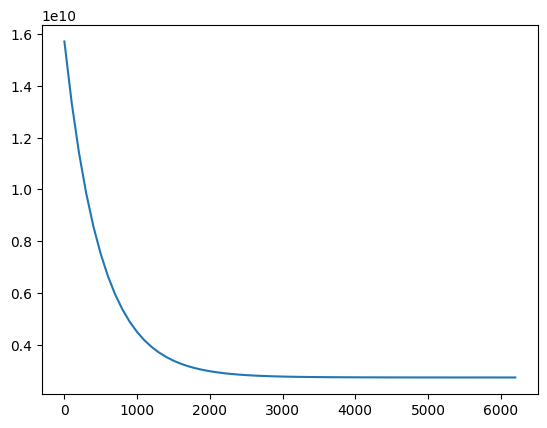

In [7]:
plt.plot(iterations, costs)

In [55]:
plt.show()